<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/red_social_'_BI_social_networks_class_20230918_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data reading
path = "/content/drive/MyDrive/BI/ClientMovementsSN.csv"
df = pd.read_csv(path , encoding='latin1', sep = ";")  # 749,202 , 13
#rename columns
df.columns = ['date', 'client_id', 'movement', 'balance_in', 'transferor','balance_out', 'recepient', 'agent_id', 'status', 'channel', 'aux','in', 'out']
df.head()

,date,client_id,movement,balance_in,transferor,balance_out,recepient,agent_id,status,channel,aux,in,out
0,31/12/2018,1,in,25777382,Competitor 14,0,Competitor 9,24597,Active,CHANNEL 4,1,1,0
1,28/02/2018,2,out,0,Competitor 9,0,Competitor 10,13087,Inactive,CHANNEL 5,1,0,1
2,31/01/2017,3,out,0,Competitor 9,17552962,Competitor 10,18024,Inactive,CHANNEL 5,1,0,1
3,31/08/2019,4,in,1965188,Competitor 2,0,Competitor 9,14667,Active,CHANNEL 1,1,1,0
4,31/03/2017,5,out,0,Competitor 9,29433839,Competitor 10,30677,Inactive,CHANNEL 5,1,0,1


In [ ]:

competidor = ['Competitor 14', 'Competitor 9', 'Competitor 2', 'Competitor 3',
              'Competitor 12', 'Competitor 7', 'Competitor 10', 'Competitor 13',
              'Competitor 6', 'Competitor 4', 'Competitor 8', 'Competitor 5']
competidor_name = ['PENSIONISSSTE','Citibanamex','XXI Banorte','Profuturo','Sura','Principal',
                     'Azteca','Inbursa','Invercap','Coppel', 'MetLife', 'Santander Mexicano']
dict_comp = dict(zip(competidor, competidor_name))
canal = ['CHANNEL 1', 'CHANNEL 2','CHANNEL 3', 'CHANNEL 4', 'CHANNEL 5',
         'CHANNEL 6', 'CHANNEL 7', 'CHANNEL 8']
canal_name = ['Redes Sociales', 'TV', 'Radio', 'Representante', 'Llamada',
              'Volante', 'Pag Internet', 'Establecimiento']
dict_canal = dict(zip(canal, canal_name))

df.replace(dict_comp, inplace=True)
df.replace(dict_canal, inplace=True)

In [ ]:
#make the tuples of agent_id_x and agent_id_y and how many clients have in common
df1 = df.loc[:, ['client_id', 'agent_id']]
df2 = df1.merge(df1, on = 'client_id', how='left').drop_duplicates()
df2 = df2.query("agent_id_x !=agent_id_y") # 1 775 436
clientes_unicos = df2.groupby(['agent_id_x', 'agent_id_y']).agg({'client_id': "nunique"}).reset_index().drop_duplicates()
clientes_unicos_bup = clientes_unicos.copy()

# it takes a loooong time

# unique_pairs = set()

# unique_rows = []

# for _, row in clientes_unicos.iterrows():
#     agents = tuple(sorted([row['agent_id_x'], row['agent_id_y']]))
#     if agents not in unique_pairs:
#         unique_pairs.add(agents)
#         unique_rows.append(row)

# df_unique = pd.DataFrame(unique_rows)

# df_unique.reset_index(drop=True, inplace=True)
# df_unique.sort_values(by = ['agent_id_x','agent_id_y'], inplace=True)
# df_unique_2 = df_unique.sort_values(by = ['client_id' ])
# df_unique_2.to_csv('/content/drive/MyDrive/BI/df_unique_2_final_20230923.csv')

In [ ]:
df_unique_2 = pd.read_csv("/content/drive/MyDrive/BI/df_unique_2_final_20230923.csv") # se guardo y se lee de aqui
df_unique_2 = df_unique_2.iloc[:,1:]
df_unique_2.head()

,agent_id_x,agent_id_y,client_id
0,2,12539,1
1,6297,6560,1
2,6297,6566,1
3,6297,6573,1
4,6297,6585,1


In [ ]:
pareto =pd.DataFrame( df_unique_2.client_id.value_counts().index, columns =['count_clients_index'] )
pareto['count_clients_common']  =df_unique_2.client_id.value_counts().values
pareto['cumsum1'] = pareto.count_clients_common.cumsum()
pareto['pct'] = pareto.count_clients_common /pareto.count_clients_common.sum()
pareto['pctcum'] = pareto.pct.cumsum()
# pareto.query("count_clients_index > 4").pct.sum()
pareto#.to_csv("/content/drive/MyDrive/BI/"+ 'pareto.csv')

,count_clients_index,count_clients_common,cumsum1,pct,pctcum
0,1,885705,885705,0.999307,0.999307
1,2,386,886091,0.000436,0.999743
2,3,84,886175,0.000095,0.999838
3,4,60,886235,0.000068,0.999905
4,5,26,886261,0.000029,0.999935
5,6,16,886277,0.000018,0.999953
6,7,8,886285,0.000009,0.999962
7,8,7,886292,0.000008,0.999970
8,9,6,886298,0.000007,0.999976
9,10,6,886304,0.000007,0.999983


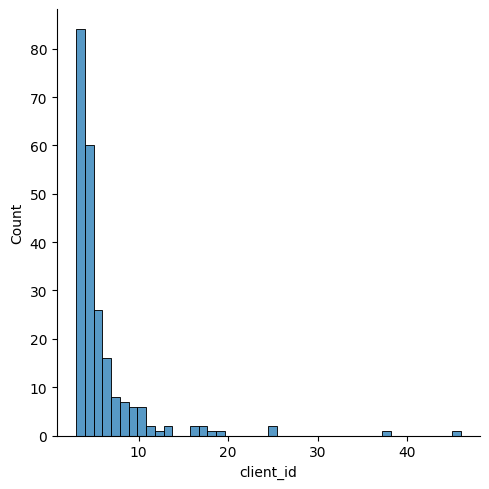

In [ ]:
sns.displot(df_unique_2.query("client_id>2").client_id)

In [ ]:
#SE TARDA MUCHO
# import networkx as nx #libreria que se especializa en nodos

# df3 = df_unique_2.loc[:, ['agent_id_x','agent_id_y']]
# df3['tuplas'] =  df3.apply(lambda row: (row['agent_id_x'], row['agent_id_y']), axis=1) # hacemos tuplas de los agentes

# # creamos un grafo vacio
# G = nx.Graph()

# # agregamos los nodos (agentes unicos) al grafo,
# nodes =list(df.agent_id.unique()) # ["A", "B", "C", "D", "E"]
# G.add_nodes_from(nodes)

# # a;adimos las conexiones (connections) entre los nodos
# edges = list(df3['tuplas'] ) #[("A", "B"), ("A", "C"), ("B", "C"), ("C", "D"), ("D", "E")]
# G.add_edges_from(edges)

# # calculamos el  degree centrality para cada nodo
# degree_centrality = nx.degree_centrality(G)

# # los guardamos en una lista degree centrality values
# lst_degree_cent = []
# for node, centrality in degree_centrality.items():
#     lst_degree_cent.append([node, centrality])
# degree_centrality.to_csv("/content/drive/MyDrive/BI/degree_centrality.csv")
# degree_centrality = pd.DataFrame(data = lst_degree_cent, columns = ['agent_id', 'degree_centrality'])

degree_centrality = pd.read_csv("/content/drive/MyDrive/BI/degree_centrality.csv")
degree_centrality.rename(columns = {'node_agent_id': "agent_id"}, inplace= True)
degree_centrality = degree_centrality.iloc[:,1:]
degree_centrality.sort_values(by='degree_centrality', ascending=False, inplace=True)
degree_centrality.head()

,agent_id,degree_centrality
0,18356,0.044551
1,24095,0.044455
2,30621,0.043368
3,18804,0.043081
4,8506,0.042761


In [ ]:
# #  SE TARDA MUCHO
# # Se crea el grafo
# G1 = nx.Graph()
# #a;adimos las conexiones
# G1.add_edges_from(  list(df3['tuplas'] ) )

# # calculamos el  closeness centrality
# closeness_centrality = nx.closeness_centrality(G)
# lst_closeness =[]
# # guardamos el  closeness centrality para cada nodo en la lista
# for node2, closeness2 in closeness_centrality.items():
#     lst_closeness.append([node2, closeness2])

# closeness = pd.DataFrame(lst_closeness, columns =['agent_id', 'closeness'])
closeness= pd.read_csv("/content/drive/MyDrive/BI/closeness.csv")
closeness = closeness.iloc[:,1:]
closeness.rename(columns={'node':'agent_id'}, inplace=True)
closeness.head()

,agent_id,closeness
0,24597,0.02007
1,13087,0.00000
2,18024,0.00000
3,14667,0.00000
4,30677,0.00000


In [ ]:
close_centra = closeness.merge(degree_centrality, on = 'agent_id', how ='left')
close_centra.sort_values(by =["closeness","degree_centrality"], inplace= True ,
                         ascending=False)
close_centra.reset_index(inplace=True, drop=True)
close_centra.head()

,agent_id,closeness,degree_centrality
0,18356,0.055876,0.044551
1,24095,0.054569,0.044455
2,18804,0.054082,0.043081
3,1376,0.053586,0.042442
4,8506,0.053461,0.042761


In [ ]:
clientes_unicos.query('agent_id_x == 18356 | agent_id_y == 18356').client_id.value_counts().sum()

2788

In [ ]:
df4 = close_centra.merge(df, on ='agent_id', how='left')
df4.head()

,agent_id,closeness,degree_centrality,date,client_id,movement,balance_in,transferor,balance_out,recepient,status,channel,aux,in,out
0,18356,0.055876,0.044551,31/08/2016,326,in,36488451,Inbursa,0,Citibanamex,Active,Redes Sociales,1,1,0
1,18356,0.055876,0.044551,30/04/2016,404,in,22662425,Sura,0,Citibanamex,Active,Redes Sociales,1,1,0
2,18356,0.055876,0.044551,30/04/2019,404,out,0,Citibanamex,29780956,Azteca,Active,Redes Sociales,1,0,1
3,18356,0.055876,0.044551,31/10/2017,952,in,19278448,Profuturo,0,Citibanamex,Active,Redes Sociales,1,1,0
4,18356,0.055876,0.044551,31/01/2020,1724,in,17765258,PENSIONISSSTE,0,Citibanamex,Active,Redes Sociales,1,1,0


In [ ]:
trans_gb = df4.groupby("transferor").mean()
trans_gb#.loc[:,[	'closeness'	,'degree_centrality'	]]

<ipython-input-23-60477e23c3da>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trans_gb = df4.groupby("transferor").mean()


,agent_id,closeness,degree_centrality,client_id,balance_in,balance_out,aux,in,out
transferor,,,,,,,,,
Azteca,18598.610239,0.014224,0.001462,348090.291269,2.170129e+07,0.000000e+00,1.0,1.0,0.0
Citibanamex,14990.676800,0.017150,0.005983,345558.696030,0.000000e+00,5.125973e+07,1.0,0.0,1.0
Coppel,19900.193831,0.014162,0.000584,343179.775080,4.991830e+06,0.000000e+00,1.0,1.0,0.0
Inbursa,18155.656065,0.020129,0.001258,345347.482456,2.419220e+07,0.000000e+00,1.0,1.0,0.0
Invercap,18900.688841,0.020638,0.001242,346349.425169,2.087553e+07,0.000000e+00,1.0,1.0,0.0
MetLife,17386.260365,0.024891,0.003114,347067.348006,2.779111e+07,0.000000e+00,1.0,1.0,0.0
PENSIONISSSTE,18969.013503,0.019150,0.001161,345291.233638,1.726235e+07,0.000000e+00,1.0,1.0,0.0
Principal,18614.643298,0.017714,0.001186,344716.508500,1.371200e+07,0.000000e+00,1.0,1.0,0.0
Profuturo,19387.510526,0.015569,0.000838,344903.824940,1.092432e+07,0.000000e+00,1.0,1.0,0.0


In [ ]:
rec_gb = df4.groupby("recepient").mean()
rec_gb#.loc[:,[	'closeness'	,'degree_centrality'	]]

<ipython-input-24-203d8da5b224>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rec_gb = df4.groupby("recepient").mean()


,agent_id,closeness,degree_centrality,client_id,balance_in,balance_out,aux,in,out
recepient,,,,,,,,,
Azteca,14990.676800,0.017150,0.005983,345558.696030,0.000000e+00,5.125973e+07,1.0,0.0,1.0
Citibanamex,19023.216087,0.017553,0.001057,344912.895971,1.549917e+07,0.000000e+00,1.0,1.0,0.0


In [ ]:
df_unique_2.head()
df5 = df_unique_2.query("client_id > 3")
df6_top = pd.concat([df5.agent_id_x , df5.agent_id_y ], axis=0 ,names='agent_id')
df6_top = pd.DataFrame(df6_top, columns=['agent_id'])
df6_top.head()

,agent_id
886175,6510
886176,12627
886177,21624
886178,16684
886179,9245


In [ ]:
df4 = df6_top.merge(df, on ='agent_id', how='left').drop_duplicates()
df4.shape
# df4.head()

(43585, 13)

In [ ]:
agrupador = 'channel'
df7 = df4.groupby(agrupador).count()
pathout = "/content/drive/MyDrive/BI/"
df7.loc[:, 'agent_id'].sort_values(ascending=False).reset_index()#.to_csv(pathout + f'count_top_{agrupador}_3.csv')

,channel,agent_id
0,Redes Sociales,31414
1,Llamada,8494
2,Representante,3677


In [ ]:
df4.groupby('recepient').count()

,agent_id,date,client_id,movement,balance_in,transferor,balance_out,status,channel,aux,in,out
recepient,,,,,,,,,,,,
Azteca,13685,13685,13685,13685,13685,13685,13685,13685,13685,13685,13685,13685
Citibanamex,29900,29900,29900,29900,29900,29900,29900,29900,29900,29900,29900,29900


In [ ]:
top_close = close_centra.loc[:, ['agent_id','closeness']].sort_values(by = 'closeness', ascending=False).reset_index(drop=True).iloc[:10,:]
top_close

,agent_id,closeness
0,18356,0.055876
1,24095,0.054569
2,18804,0.054082
3,1376,0.053586
4,8506,0.053461
5,4736,0.053410
6,4659,0.053217
7,3130,0.053177
8,18623,0.053166
9,8539,0.053091


In [ ]:
top_centrality = close_centra.loc[:, ['agent_id','degree_centrality']].sort_values(by = 'degree_centrality', ascending=False).reset_index(drop=True).iloc[:10,:]
top_centrality

,agent_id,degree_centrality
0,18356,0.044551
1,24095,0.044455
2,30621,0.043368
3,18804,0.043081
4,4833,0.042761
5,8506,0.042761
6,18623,0.042697
7,6269,0.042601
8,8250,0.042570
9,9733,0.042570


In [ ]:
# top_close.to_csv('/content/drive/MyDrive/BI/top_close.csv')

Experimentos

In [ ]:
df_unique_2.query("agent_id_x == 18356")

,agent_id_x,agent_id_y,client_id
232256,18356,29085,1
232257,18356,29097,1
232258,18356,29110,1
232259,18356,29113,1
232260,18356,29114,1
...,...,...,...
885734,18356,18623,2
885831,18356,23052,2
886181,18356,29054,4
886229,18356,19538,4


In [ ]:
df.query("agent_id == 18356")

,date,client_id,movement,balance_in,transferor,balance_out,recepient,agent_id,status,channel,aux,in,out
351,31/08/2016,326,in,36488451,Inbursa,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
434,30/04/2016,404,in,22662425,Sura,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
435,30/04/2019,404,out,0,Citibanamex,29780956,Azteca,18356,Active,Redes Sociales,1,0,1
1033,31/10/2017,952,in,19278448,Profuturo,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
1865,31/01/2020,1724,in,17765258,PENSIONISSSTE,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746382,31/03/2020,687160,in,18859489,Profuturo,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
747561,31/10/2017,688231,in,22008779,PENSIONISSSTE,0,Citibanamex,18356,Active,Redes Sociales,1,1,0
747562,31/07/2019,688231,out,0,Citibanamex,24427547,Azteca,18356,Active,Redes Sociales,1,0,1
748586,31/12/2016,689175,in,29649473,PENSIONISSSTE,0,Citibanamex,18356,Active,Redes Sociales,1,1,0


In [ ]:
df_unique_2.head()

,agent_id_x,agent_id_y,client_id
0,2,12539,1
1,6297,6560,1
2,6297,6566,1
3,6297,6573,1
4,6297,6585,1


In [ ]:

# --------EDA
lst_unique = []
for col in ['client_id', 'movement',  'transferor',
       'balance_out', 'recepient', 'agent_id', 'status', 'channel', 'aux',
       'in', 'out']:
    uni = len(df.loc[:, col].unique())
    lst_unique.append([col, uni])
df_lenUnique = pd.DataFrame(lst_unique, columns=['col','cant_unicos'])
display(df_lenUnique)

#client Id  / agent Id

# establecer que agentes estan conectados con 1 cliente o mas
data = df.loc[:, ['client_id', 'agent_id']] #datos iniciales con los que se trabajara
unique_ag = data.loc[:, 'agent_id'].unique()  # 31,291 agentes unicos
unique_cli = list(data.loc[:, 'client_id'].unique())  # 689,751 clientes unicos


,col,cant_unicos
0,client_id,689751
1,movement,2
2,transferor,12
3,balance_out,352214
4,recepient,2
5,agent_id,31291
6,status,3
7,channel,8
8,aux,1
9,in,2


In [ ]:
df

,date,client_id,movement,balance_in,transferor,balance_out,recepient,agent_id,status,channel,aux,in,out
0,31/12/2018,1,in,25777382,PENSIONISSSTE,0,Citibanamex,24597,Active,Representante,1,1,0
1,28/02/2018,2,out,0,Citibanamex,0,Azteca,13087,Inactive,Llamada,1,0,1
2,31/01/2017,3,out,0,Citibanamex,17552962,Azteca,18024,Inactive,Llamada,1,0,1
3,31/08/2019,4,in,1965188,XXI Banorte,0,Citibanamex,14667,Active,Redes Sociales,1,1,0
4,31/03/2017,5,out,0,Citibanamex,29433839,Azteca,30677,Inactive,Llamada,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749197,31/03/2020,689748,in,14225263,Principal,0,Citibanamex,12016,Active,Redes Sociales,1,1,0
749198,31/07/2017,689749,in,1518039,PENSIONISSSTE,0,Citibanamex,24328,Active,Representante,1,1,0
749199,31/08/2019,689750,in,66798498,Sura,0,Citibanamex,17817,Active,Representante,1,1,0
749200,30/09/2017,689751,in,107305,Coppel,0,Citibanamex,6022,Inactive,Llamada,1,1,0
